# Математичні моделі в продуктовому маркетингу

## Тестування гіпотез. АВ тести.

###  Практична робота 5

**_Студентка Пороскун Олена. Група ПМ.м-21_**

Створення нового продукту - справа ризикована. Саме тому продуктова команда постійно перевіряє всі гіпотези (приклади успішних фіч інших продуктів, будь-які ідеї, не підкріплені даними) на відповідність дійсності, щоб знизити ризики.
Єдиний спосіб дізнатися більше - сформулювати гіпотезу, перевірити її і зробити висновки на основі результатів.

Дизайн експерименту включає:

Крок 1. Формулювання гіпотези і бажаного результату.

Крок 2. Визначення способу перевірки гіпотези і проведення експерименту.

Крок 3. Формування вибірки користувачів, які будуть брати участь в експерименті; поділ на дві групи: тестову і контрольну. Користувачі першої категорії отримають експериментальну версію продукту, а користувачі другої категорії - звичайну. Переконайтеся, що розподіл користувачів випадковий.

Крок 4. Визначення метрик, за якими ви будете вимірювати результати змін.

Крок 5. Визначення очікуваного ефекту від експерименту для успіху (MDE) - напр., % збільшення конверсії від середнього поточного рівня.

Крок 6. Визначення розміру вибірки для вимірювання змін від експерименту - через Python (https://towardsdatascience.com/the-math-behind-a-b-testing-with-example-code-part-1-of-2-7be752e1d06f) або через онлайн-калькулятор (Sample Size Calculator (Evan’s Awesome A/B Tools) (evanmiller.org)). 

Крок 7. Визначення мінімальної кількості днів для проведення тесту = MIN sample size per group * 2 / AVG Num

Крок 8. Пріоритизація гіпотез - напр., за методологією 
RICE: https://www.intercom.com/blog/rice-simple-prioritization-for-product-managers/


$Рішення$

**Формулювання гіпотези і бажаного результату.**

*Приклад гри*: «RAID: Shadow Legends».

**Нульова гіпотеза (H0)**: зменшення складності 20 рівня (Краб-скарабей) у Судній вежі у звичайному режимі **не призведе** до зміни коефіцієнта конверсії — відношення цільових дій до загальної кількості відвідувачів або що, тобто не змінить долю гравців, що завершили його. 

Нульовою гіпотезою буде нормальний розподіл із середнім значенням нуль і стандартним відхиленням, що дорівнює об'єднаній стандартній похибці.

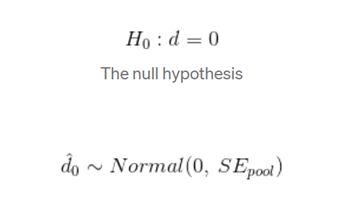

**Альтернативна гіпотеза (H1)**: зменшення складності 20 рівня (Краб-скарабей) у Судній вежі у звичайному режимі **призведе** до покращення коефіцієнта конверсії на 10%  — відношення цільових дій до загальної кількості відвідувачів або що, тобто збільшить долю гравців, що завершили його.

Альтернативна гіпотеза має таке ж стандартне відхилення, як і нульова гіпотеза, але середнє значення буде знаходитися на рівні різниці в коефіцієнті конверсії, $\hat{d}$. Це має сенс, оскільки ми можемо обчислити різницю в коефіцієнтах конверсії безпосередньо з даних, але нормальний розподіл представляє можливі значення, які міг би дати нам наш експеримент.

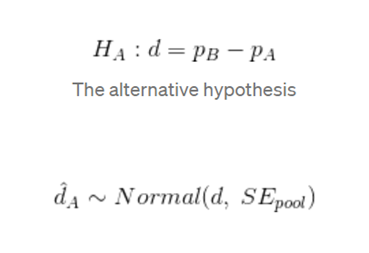

*У цьому прикладі ми хочемо підвищити коефіцієнт конверсії на 10%.*

**Формування вибірки користувачів, які будуть брати участь в експерименті; поділ на дві групи: тестову і контрольну.**

Користувачі першої категорії отримають експериментальну версію продукту, а користувачі другої категорії - звичайну (розподіл користувачів випадковий).

In [1]:
import scipy.stats as scs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from src.plot import *
from src.data import *
from src.stats import *

**Визначення метрик, за якими ви будете вимірювати результати змін.**

Метрика: Completion Rate 20-го рівня або Середнє значення між двома групами (тестовою та контрольною).

Приклад візуалізації Completion Rate 3-го рівня

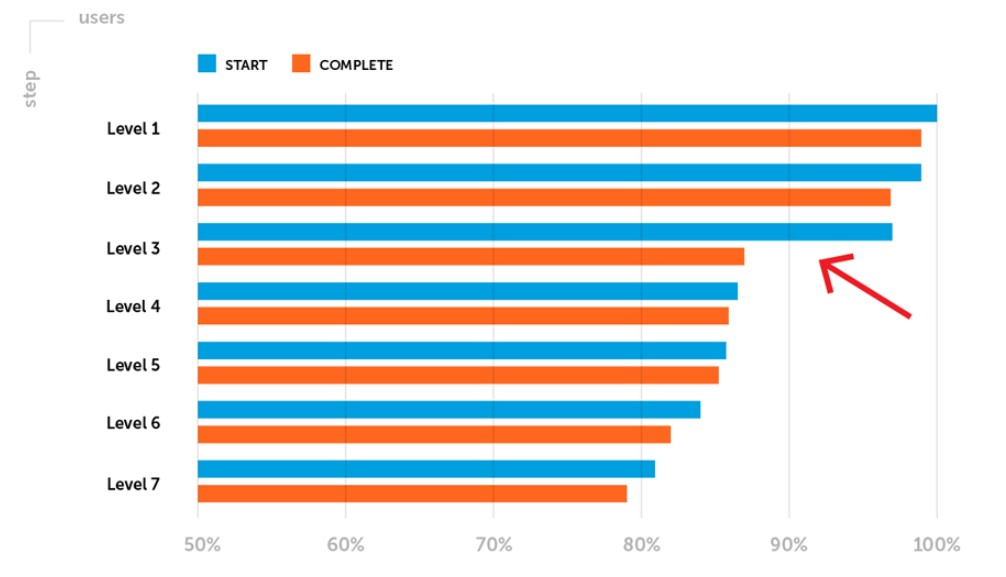

**Очікуваний ефект від експерименту для успіху (MDE):**

Очікується, що зменшення складності 20 рівня (Краб-скарабей) у Судній вежі у звичайному режимі, збільшить на 10% конверсію від середнього поточного рівня.

**Розраховуємо обсяг вибірки та тривалість проведення експерименту.**

In [4]:
import scipy.stats as scs

def min_sample_size(bcr, mde, power=0.8, sig_level=0.05):
    """Returns the minimum sample size to set up a split test
    Arguments:
        bcr (float): probability of success for control, sometimes
        referred to as baseline conversion rate
        mde (float): minimum change in measurement between control
        group and test group if alternative hypothesis is true, sometimes
        referred to as minimum detectable effect
        power (float): probability of rejecting the null hypothesis when the
        null hypothesis is false, typically 0.8
        sig_level (float): significance level often denoted as alpha,
        typically 0.05
    Returns:
        min_N: minimum sample size (float)
    References:
        Stanford lecture on sample sizes
        http://statweb.stanford.edu/~susan/courses/s141/hopower.pdf
    """
    # standard normal distribution to determine z-values
    standard_norm = scs.norm(0, 1)

    # find Z_beta from desired power
    Z_beta = standard_norm.ppf(power)

    # find Z_alpha
    Z_alpha = standard_norm.ppf(1-sig_level/2)

    # average of probabilities from both groups
    pooled_prob = (bcr + bcr+mde) / 2

    min_N = (2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2
             / mde**2)

    return min_N

In [5]:
min_size = min_sample_size(bcr=0.10, mde=0.02)
min_size

3842.026629963879

**Визначення мінімальної кількості днів для проведення тесту = MIN sample size per group * 2 / AVG Num**

Загальна кількість необхідних користувачів ÷ середня кількість користувачів на день = приблизна кількість днів експерименту

In [6]:
print('Кількість днів експерименту:', round(min_size / 1000))

Кількість днів експерименту: 4


In [7]:
bcr   = 0.10  # базовий коефіцієнт конверсії
d_hat = 0.02  # різниця між групами

In [8]:
N_A = 2000 # контрольна вибірка
N_B = 2000 # тестова вибірка

In [9]:
p_A = bcr
p_B = d_hat

In [10]:
ab_data = generate_data(N_A, N_B, bcr, d_hat)
ab_data

,group,converted
0,B,0
1,B,0
2,B,0
3,B,0
4,A,0
...,...,...
3995,B,0
3996,A,0
3997,B,0
3998,B,0


Стовпець  *converted*  показує, чи пройшов користувач повторно 20 рівень У Судовій вежі, чи ні, за допомогою 1 або 0 відповідно. 

Група A буде використовуватися для нашої контрольної групи, а група B буде нашою тестовою групою.

**Пріоритизація гіпотез**

In [11]:
ab_summary = ab_data.pivot_table(values='converted', index='group', aggfunc=np.sum)

ab_summary['total'] = ab_data.pivot_table(values='converted', index='group', aggfunc=lambda x: len(x))
ab_summary['rate']  = ab_data.pivot_table(values='converted', index='group')
ab_summary

,converted,total,rate
group,,,
A,195,1983,0.098336
B,50,2017,0.024789


In [12]:
abs(round(ab_summary['rate']['B'] - ab_summary['rate']['A'], 3))

0.074

Схоже, що різниця в коефіцієнтах конверсії між двома групами становить 0.074, що більше, ніж 0.02, до якого ми спочатку прагнули. 
Це хороший знак, але цього недостатньо для того, щоб ми могли з упевненістю використовувати новий дизайн. На даний момент ми не виміряли, наскільки ми впевнені в цьому результаті. Це можна зменшити, подивившись на розподіл двох груп.

*Порівняння двох груп*

Ми можемо порівняти дві групи, побудувавши графік розподілу контрольної групи і розрахувавши ймовірність отримання результату нашої тестової групи. Ми можемо припустити, що розподіл для нашої контрольної групи є біноміальним, оскільки дані є серією випробувань Бернуллі, де кожне випробування має лише два можливих результати (подібно до підкидання монети).

In [13]:
A_converted = ab_summary['converted']['A']
B_converted = ab_summary['converted']['B']

A_total = ab_summary['total']['A']
B_total = ab_summary['total']['B']

A_cr = ab_summary['rate']['A']
B_cr = ab_summary['rate']['B']

Text(0, 0.5, 'probability')

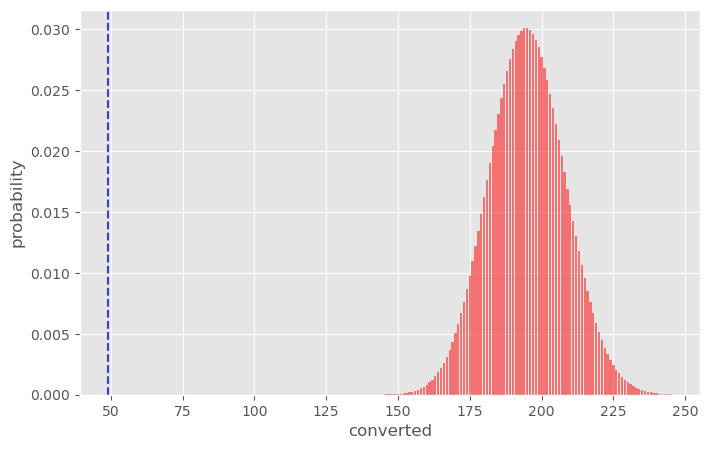

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
x = np.linspace(A_converted - 49, A_converted + 50, 100)
y = scs.binom(A_total, A_cr).pmf(x)
ax.bar(x, y, alpha=0.5, color='r')
ax.axvline(x=B_cr * A_total, c='blue', alpha=0.75, linestyle='--')
plt.xlabel('converted')
plt.ylabel('probability')

Розподіл для контрольної групи показано червоним кольором, а результат тестової групи позначено синьою пунктирною лінією. Ми бачимо, що ймовірність отримання результату тестової групи була дуже низькою. Однак ймовірність не відображає рівень достовірності результатів. Вона не враховує розмір вибірки нашої тестової групи. Інтуїтивно, ми б почувалися більш впевнено в наших результатах, якби розмір нашої вибірки був більшим. Давайте продовжимо і побудуємо графік результатів тестової групи у вигляді біноміального розподілу і порівняємо розподіли між собою.

*Біноміальний розподіл*

Text(0, 0.5, 'probability')

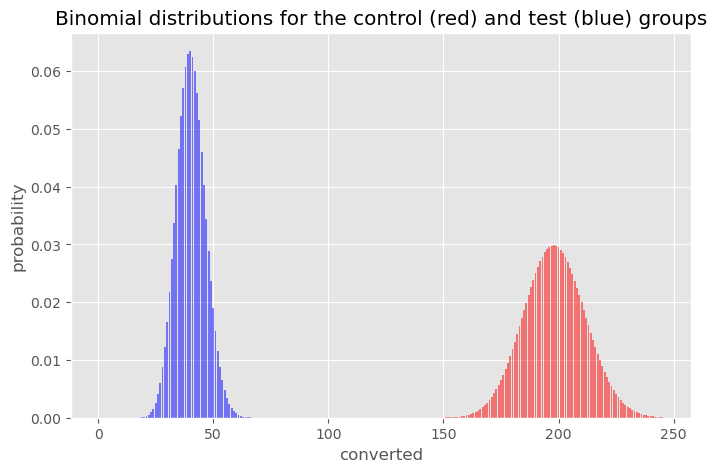

In [15]:
fig, ax = plt.subplots(figsize=(8,5))

xA = np.linspace(A_converted-49, A_converted+50, 100)
yA = scs.binom(A_total, p_A).pmf(xA)
ax.bar(xA, yA, alpha=0.5, color='red')

xB = np.linspace(B_converted-49, B_converted+50, 100)
yB = scs.binom(B_total, p_B).pmf(xB)
ax.bar(xB, yB, alpha=0.5, color='blue')

plt.title('Binomial distributions for the control (red) and test (blue) groups')
plt.xlabel('converted')
plt.ylabel('probability')

*Ми бачимо, що тестова група конвертувала більше користувачів, ніж контрольна. Ми також бачимо, що пік результатів контрольної групи нижчий, ніж у тестовій групі.*

**Отже, приймаємо альтернативну гіпотезу, а нульову відкидаємо. Тобто зменшення складності 20 рівня (Краб-скарабей) у Судній вежі у звичайному режимі призведе до покращення коефіцієнта конверсії на 10%.**

__________________________________________________________________________________________________________________________